---
<a name='title'></a>
# **<font color="Navy"> Temas Selectos </font>**
## **<font color="RoyalBlue"> Tema 3: Estadística </font>**
### **<font color="DodgerBlue"> Notebook 2: Regresión no lineal </font>**
#### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---

### **<font color="ForestGreen"> Recapitulando sobre la regresión: </font>**


1. Método de ajuste de una función para describir la relación entre dos (simple) o más (multivariada) variables.
2. La función que queramos ajustar a los datos puede ser la ecuación de la recta (regresión lineal) o no, como veremos en este notebook. 
3. El grado de bondad del ajuste (¿qué tan buena es mi función resultante para describir mi relación entre mis datos) se mide con a) medidas del error y b) coeficientes de correlación o determinación.
4. El proceso de ajustar los datos a la función objetivo busca minimizar el error cuadrático entre una predicción $\hat{y}$ y los datos. Por eso se conoce como método de **mínimos cuadrados**. 
5. Un objetivo de hacer una regresión es **evaluar** el tipo y fortaleza en la relación entre dos variables. ¿Hay relación lineal? ¿Es fuerte? Otro objetivo es predecir o clasificar datos. Por ejemplo, yo tengo datos medidos de dos variables en 1 sitio y tienen fuerte relación. Puedo usar esta relación para **predecir** cómo será la variable dependiente en un sitio donde no pueda medirla.  


### **<font color="ForestGreen"> Otros tipos de regresión </font>**

A diferencia de la regresión lineal, donde el modelo asume una relación lineal entre las variables, en la regresión no lineal, el modelo puede tener una forma funcional más compleja, como exponencial, logarítmica, polinómica, sigmoidal, entre otras.

Por ejemplo, en la regresión exponencial, el modelo asume una relación de la forma $y=a e^{bx}$, donde $y$ es la variable dependiente, $x$ es la variable independiente, $a$ y $b$ son parámetros del modelo, y $e$ es la base del logaritmo natural. Este tipo de relación se encuentra comúnmente en fenómenos que exhiben un crecimiento o decaimiento exponencial, como la propagación de una enfermedad infecciosa o la desintegración radiactiva.

A pesar de que la regresión no lineal implica modelos matemáticamente más complejos, el proceso de ajuste y evaluación del modelo es similar al de la regresión lineal. El objetivo de toda regresión (ya sea lineal o no) es encontrar el modelo que mejor **describa** a nuestros datos. Hay fenomenos observables que no pueden ser explicados por modelos lineales (el diagrama de dispersión no sigue una línea y por eso es importante considerar más de 1 modelo.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
def grafico_linea_ts(xmin,xmax,xlab,ylab,title,ymin=None,ymax=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # poner las labels de los ejes y el titulo
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    # checar si queremos leyenda, si sí, la ponemos y fancy
    if legend:
        plt.legend(fontsize=12.5,fancybox=True,shadow=True)

### **<font color="ForestGreen"> Disfrazando las regresiones </font>**

Recordando de la clase anterior que nuestro modelo de regresión lineal se escribe como:

    
\begin{align}
\hat{Y}= \beta_0 + \beta_1 x +\epsilon
\end{align}    

donde $\hat{Y}$ es la estimación de la variable a predecir, $\beta_0$ y $\beta_1$ son los coeficientes de regresión, de la ordenada al origen y la pendiente, respectivamente. $\epsilon$ representa los errores experimentales o aleatorios.
 
 
 Ahora vamos a ver los diferentes tipos de regresiones no-lineales y cómo podemos usar la regresión lineal que ya conocemos para replantear el problema. 

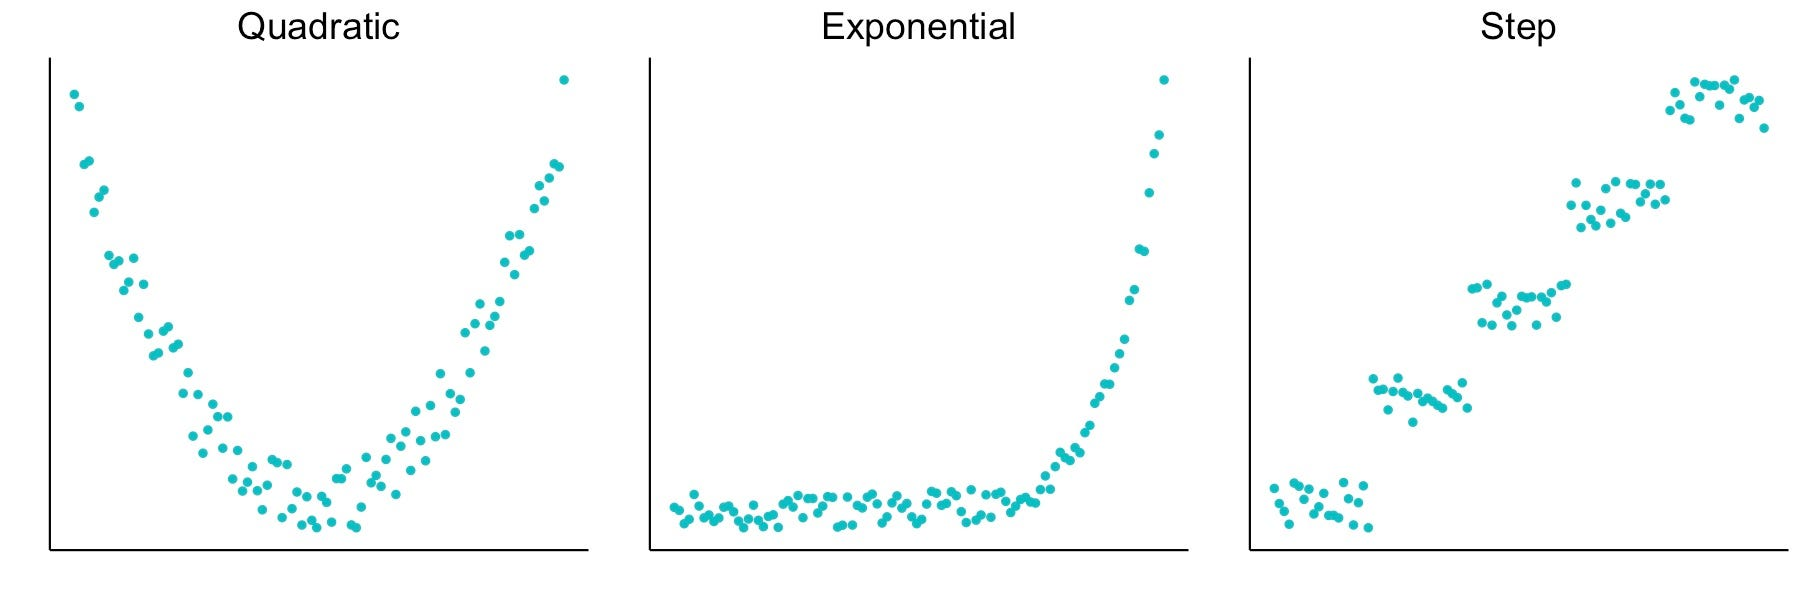
*Ilustración de diferentes tipos de relaciones no-lineales en los datos. Extraído de TowardsDataScience https://towardsdatascience.com/finding-and-visualising-non-linear-relationships-4ecd63a43e7e.*


### **<font color="ForestGreen"> Función potencial </font>**

La función potencial tiene la siguiente forma general:

\begin{align}
y= ax^b
\end{align} 

Lo que podemos traducir a nuestro modelo de regresión como

\begin{align}
\hat{Y}= y= \beta_0x^{\beta_1 }
\end{align}   

Ahora podemos disfrazar a nuestro función nivel: 

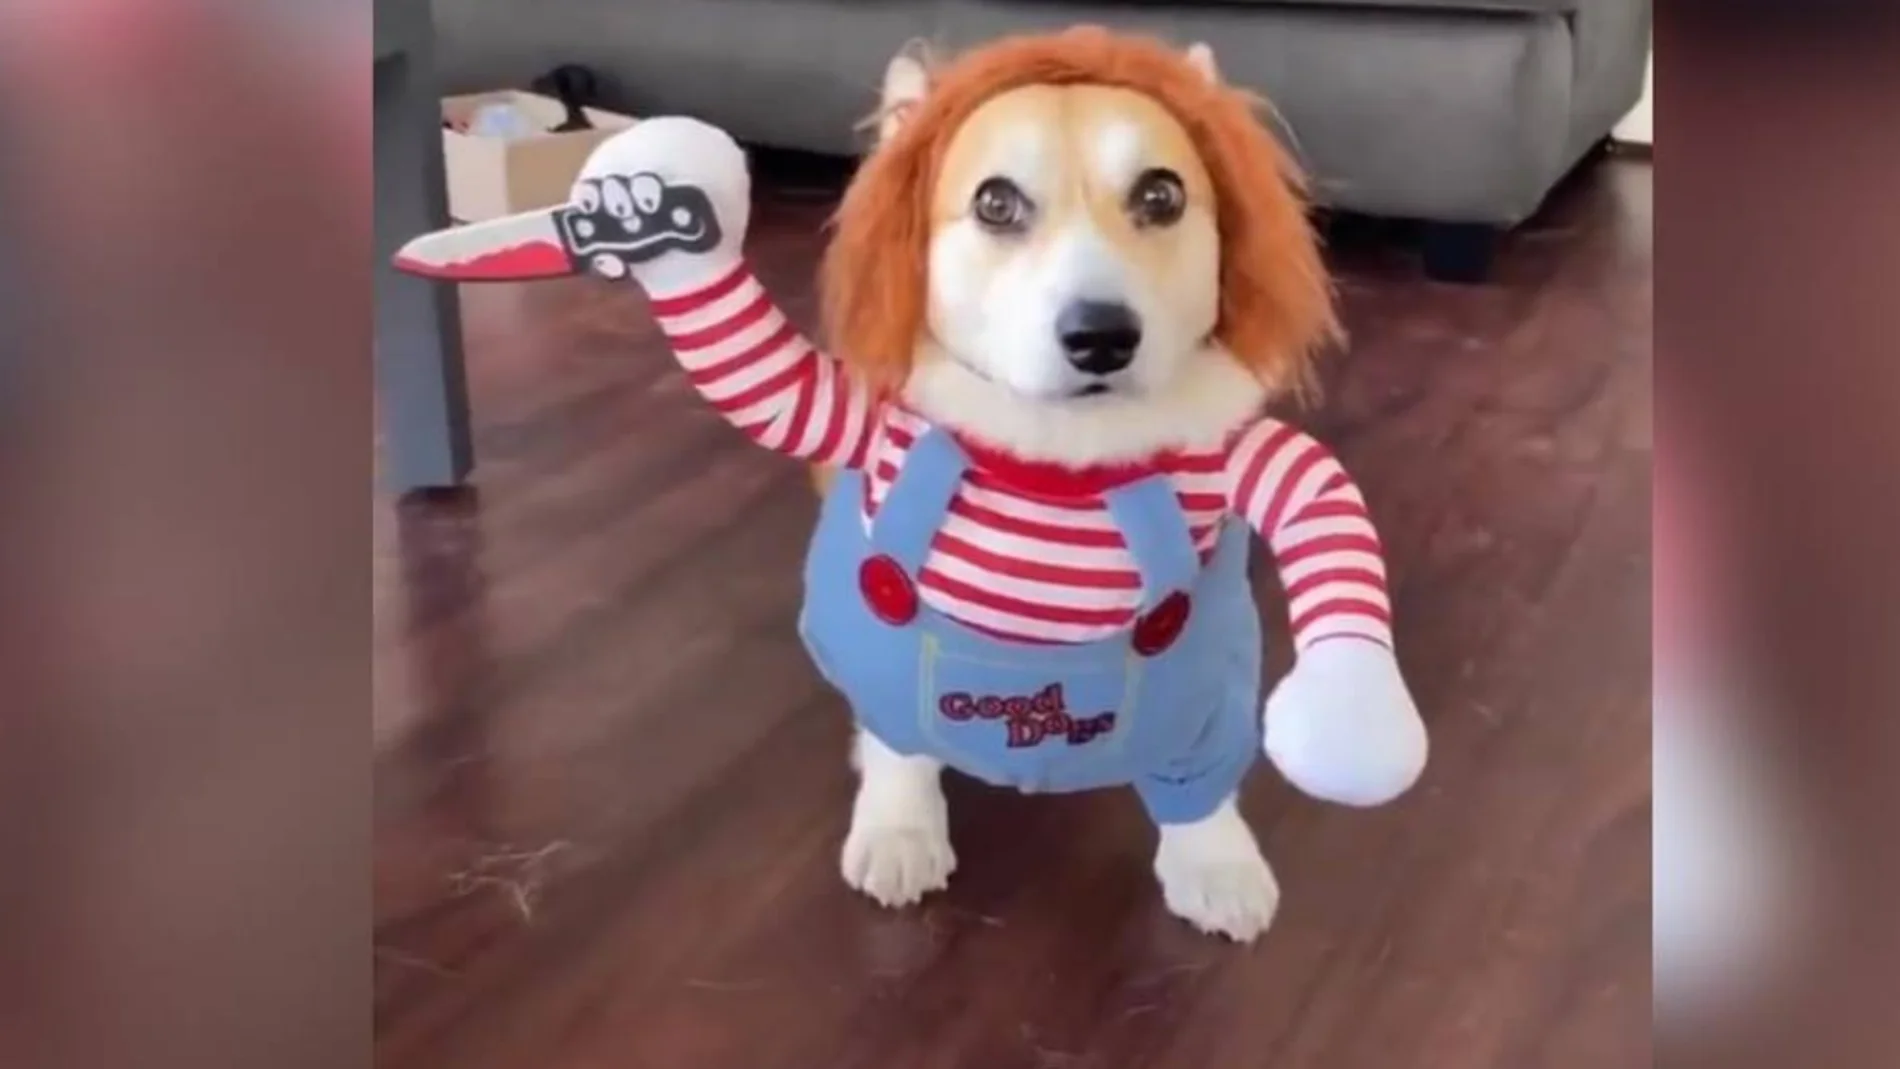

Aplicando logaritmo natural a ambos lados de la ecuación se obtiene:

\begin{align}
ln \bigg(\hat{Y}\bigg)= ln\bigg( \beta_0x^{\beta_1} \bigg)
\end{align} 

y separamos los logaritmos del lado derecho:

\begin{align}
ln \bigg(\hat{Y}\bigg)= ln(\beta_0) + ln(x^{\beta_1})
\end{align}

Una propiedad de los logaritmos es que si un argumento está elevado a un exponente, podemos bajar ese exponente a multiplicar a todo el logaritmo, algo así como:

\begin{align}
ln \bigg(\hat{Y}\bigg)= ln(\beta_0) + \beta_1\, \, ln(x)
\end{align}

Y listo, ahora tenemos una función de la forma:

\begin{align}
\hat{Y}'= \beta_0' +\beta_1' x'
\end{align} 

In [2]:
# Generar datos de ejemplo sinteticos
np.random.seed(0)
X = 5 * np.random.rand(100)  # Variable independiente
ruido = np.random.uniform(-.22, .22, size=len(X))
y = (2+ruido)* (X**(3+ruido))

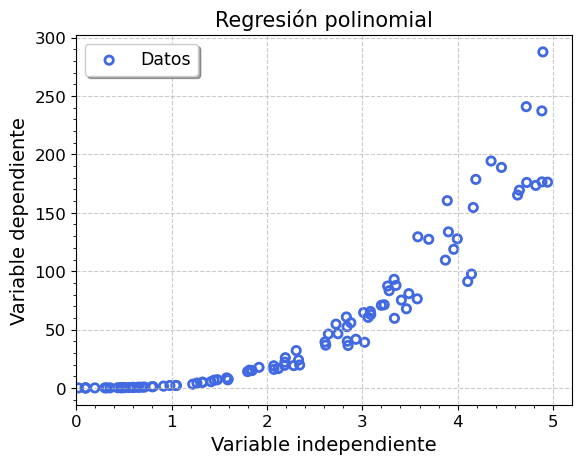

In [3]:
#graficamos los datos para ver con que tipo de relaciones estamos tratando
plt.scatter(X,y,color='royalblue', linewidth=2, facecolor='none', label='Datos')
grafico_linea_ts(0,5.2,'Variable independiente',
                 'Variable dependiente','Regresión polinomial',legend=True)

Una vez que hemos visto como se distribuyen los datos, podemos empezar con el acto de disfrazar a nuestros datos para hacer una regresión lineal. Según las ecuaciones anteriores, es necesario pasar ambas variables `X` y `y` a logaritmos. 

In [4]:
# conversion a logaritmos
logx=np.log(X)
# conversion a logaritmos
logy=np.log(y)

Vamos a graficar lo que obtenemos en el plano logarítmico. ¿Se ve más lineal?

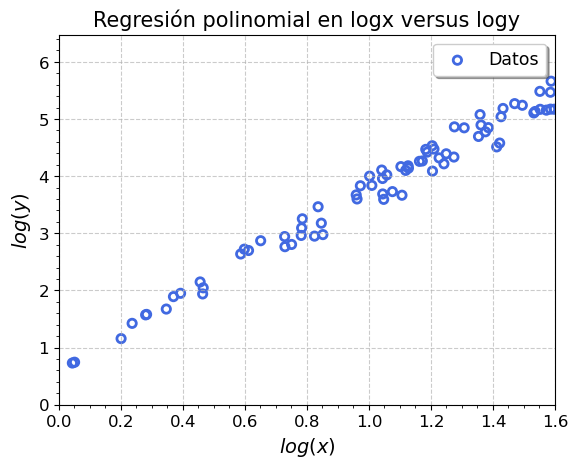

In [5]:
plt.scatter(logx,logy,color='royalblue', linewidth=2, facecolor='none', label='Datos')
grafico_linea_ts(0,1.6,'$log(x)$','$log(y)$','Regresión polinomial en logx versus logy',ymin=0,legend=True)

Una vez hecha la transformación del plano normal al plano logarítmico podemos empezar a hacer la regresión.

In [6]:
from scipy import stats

Una nueva función para calcular la regresión lineal: 

La función `scipy.stats.linregress` se utiliza para realizar una regresión lineal simple entre dos conjuntos de datos. Esta función es parte del submódulo stats de la biblioteca SciPy en Python. La manera de usar `scipy.stats.linregress` es con 2 argumentos, una variable independiente (arreglo) y una dependiente (y) `scipy.stats.linregress(x, y)`. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html



La función devuelve un objeto `LinregressResult` que contiene varios valores relevantes relacionados con la regresión lineal. El retorno de esta función son 5 parámetros::

1. slope: La pendiente de la línea de regresión.
2. intercept: El término de intercepción de la línea de regresión.
3. rvalue: El coeficiente de correlación ($r$) entre x e y.
4. pvalue: El valor p asociado al coeficiente de correlación.
5. stderr: El error estándar de la pendiente estimada de la línea de regresión.

In [7]:
resultado = stats.linregress(logx, logy)

Extraemos los resultados a través de los índices correspondientes y hacemos las predicciones para una línea recta en el espacio $log (x)$ versus $log(y)$

In [8]:
b1=resultado[0]
b0=resultado[1]
# evaluamos la variable logx con estos coeficientes para obtener una prediccion y-gorrito
predicciones=b0+b1*logx

También podemos extraer el coeficiente de correlación que según el texto arriba es el tercer parámetro de salida de la función, o el correspondiente al índice 2.

In [9]:
r=resultado[2]

In [10]:
print("el coeficiente de regresión es",np.around(r,3))

el coeficiente de regresión es 0.999


Podemos graficar todo ya completo en el plano logarítmico y a ojo de buen cubero, ver la bondad de nuestro ajuste.

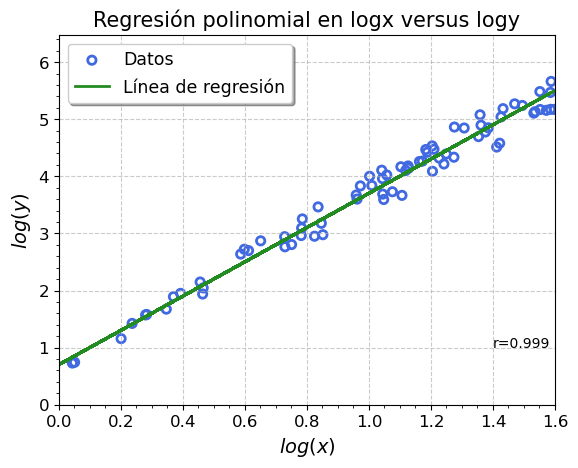

In [11]:
plt.scatter(logx,logy,color='royalblue', linewidth=2, facecolor='none', label='Datos')
plt.plot(logx,predicciones, color='forestgreen',linewidth=2, label='Línea de regresión')
plt.text(1.4,1,"r="+str(np.around(r,3)))
grafico_linea_ts(0,1.6,'$log(x)$','$log(y)$','Regresión polinomial en logx versus logy',ymin=0,legend=True)

Recordando que nuestra ecuación original se podía escribir como:

\begin{align}
\hat{Y}= y= \beta_0x^{\beta_1 }
\end{align}   

y la regla de correspondencia entre los coeficientes en el espacio logarítmico (con el símbolo ') y los coeficientes normales, i.e.:

 $\beta_0' = ln(\beta_0)$
 
 $\beta_1' =  \beta_1'$
 
 $x'= ln(x)$
 
 De la primer igualdad resulta que $\beta_0 = exp(\beta_0')$ y con eso podemos calcular nuestra $\hat{Y}$ original.


In [12]:
# conversion del coeficiente b0
b0real=np.exp(b0)
# hacemos un nuevo arreglo para evaluar el ajuste 
xreal=np.linspace(0,5,100)
# calculando y gorrito original
predicciones_completas=b0real*xreal**b1

Ahora podemos graficar todo en el plano original, con las variables originales.

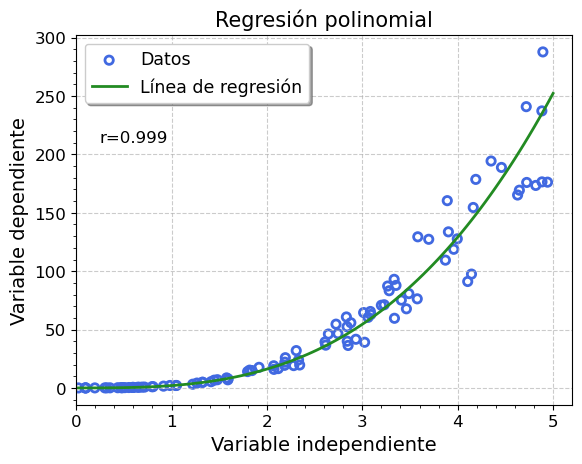

In [13]:
plt.scatter(X,y,color='royalblue', linewidth=2, facecolor='none', label='Datos')
plt.plot(xreal,predicciones_completas, color='forestgreen',linewidth=2, label='Línea de regresión')
plt.text(0.25,210,"r="+str(np.around(r,3)),fontsize=12)
grafico_linea_ts(0,5.2,'Variable independiente',
                 'Variable dependiente','Regresión polinomial',legend=True)

### **<font color="ForestGreen"> Función exponencial </font>**

La función exponencial tiene la siguiente forma general:

\begin{align}
y= ae^{bx}
\end{align} 

Lo que podemos traducir a nuestro modelo de regresión como

\begin{align}
\hat{Y}= y= \beta_0e^{\beta_1 x }
\end{align}   


Podemos disfrazar esta función también: 

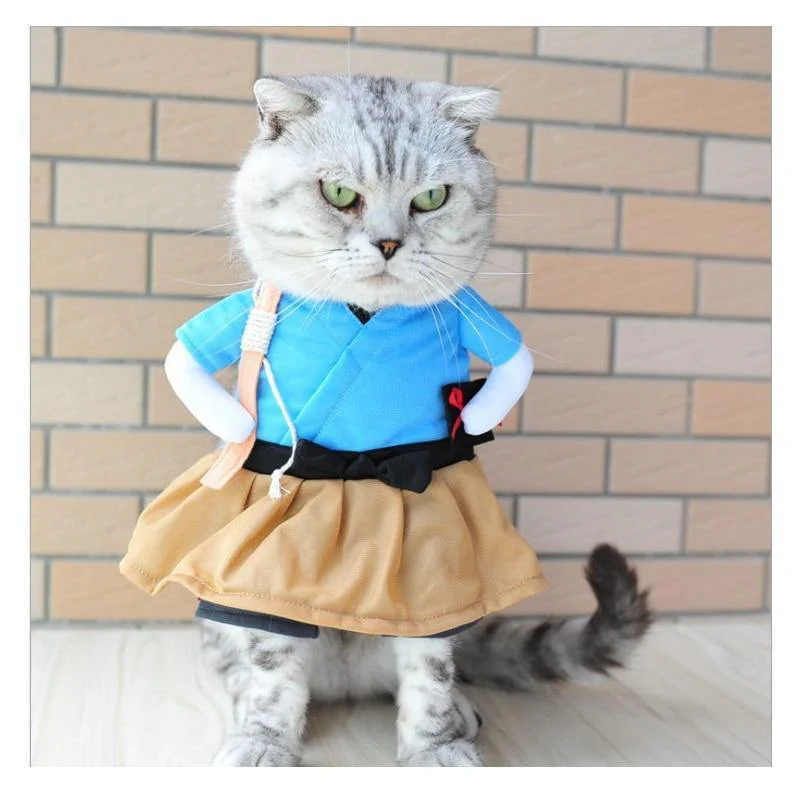

Aplicando logaritmo natural a ambos lados de la ecuación se obtiene:

\begin{align}
ln \bigg(\hat{Y}\bigg)= ln\bigg( \beta_0e^{x\beta_1} \bigg)
\end{align} 

y separamos los logaritmos del lado derecho:

\begin{align}
ln \bigg(\hat{Y}\bigg)= ln(\beta_0) + ln(e^{x\beta_1})
\end{align}

Por reglas de los logaritmos, el logaritmo natural de $e$ desaparece:

\begin{align}
ln \bigg(\hat{Y}\bigg)= ln(\beta_0) + \beta_1x
\end{align}

Y listo, ahora tenemos una función de la forma:

\begin{align}
\hat{Y}'= \beta_0' +\beta_1' x'
\end{align} 

Ahora podemos repetir nuestro anális para otros datos:

In [14]:
# Generar datos de ejemplo sinteticos
X = 5 * np.random.rand(100)  # Variable independiente
ruido = np.random.uniform(-.11, .11, size=len(X))
y = (2+ruido)*np.exp(X*(1.2+ruido))

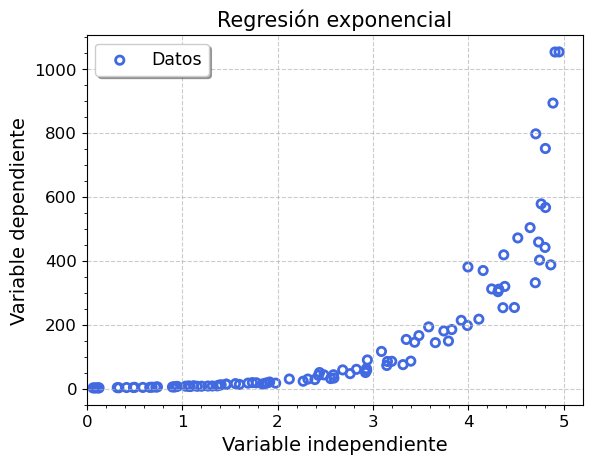

In [15]:
# grafico de exploracion de los datos
plt.scatter(X,y,color='royalblue', linewidth=2, facecolor='none', label='Datos')
grafico_linea_ts(0,5.2,'Variable independiente',
                 'Variable dependiente','Regresión exponencial',legend=True)

De la misma manera que para la regresión polinomial, necesitamos hacer conversiones entre variables a logaritmos ¿ahora quién necesita el disfraz?

In [16]:
# conversion a logaritmos
logy=np.log(y)

In [17]:
# regresion con linregress
resultado = stats.linregress(X, logy)

In [18]:
# leemos los resultados de linregress
b1=resultado[0]
b0=resultado[1]
r=resultado[2]
print(b1,b0,r)

1.1810044373212265 0.7119112481613343 0.9935929407352093


Recordando que nuestra ecuación original se podía escribir como:

\begin{align}
\hat{Y}= y= \beta_0e^{\beta_1 x }
\end{align}   

y la regla de correspondencia entre los coeficientes en el espacio logarítmico (con el símbolo ') y los coeficientes normales, i.e.:

 $\beta_0' = ln(\beta_0)$
 
 $\beta_1' =  \beta_1'$
 
 $x'= x$
 
 De la primer igualdad resulta que $\beta_0 = exp(\beta_0')$ y con eso podemos calcular nuestra $\hat{Y}$ original.

In [19]:
# conversion entre beta prima y beta
b0real=np.exp(b0)
# hacemos un nuevo vector de x para evaluar nuestra predicciones aquí
xreal=np.linspace(0,5,100)
predicciones_completas=b0real*np.exp(xreal*b1)

Viendo los valores de $\beta_0$ y $\beta_1$, ¿cómo se puede escribir la función de regresión final?

Podemos ahora terminar el ejercicio con una gráfica de la línea de regresión y de los datos.

In [20]:
# auxiliar para graficar bonito. Truco de profe indescifrable para les estudiantes. Para averiguar los secretos, conteste ¿cuántas terrologosfest fueron organizados por los profesores de esta materia?
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

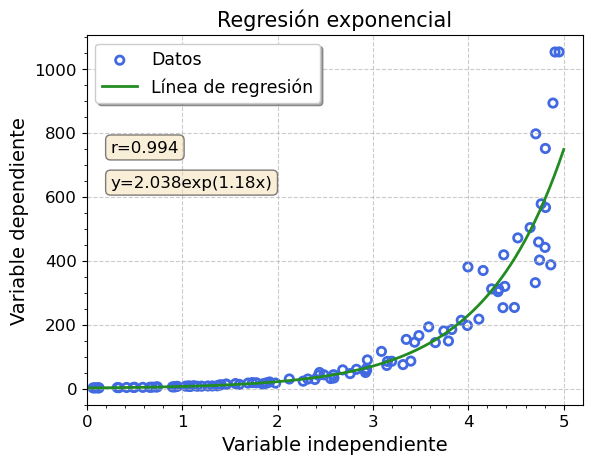

In [21]:
plt.scatter(X,y,color='royalblue', linewidth=2, facecolor='none', label='Datos')
plt.plot(xreal,predicciones_completas, color='forestgreen',linewidth=2, label='Línea de regresión')
# agregamos texto directamente a la grafica para mostrar la ecuacion de regresion y el coeficiente de correlacion. ... 
plt.text(.25,740,"r="+str(np.around(r,3)),fontsize=12,bbox=props)
plt.text(.25,630,"y="+str(np.around(b0real,3))+r"exp("+str(np.around(b1,2))+"x)",fontsize=12,bbox=props)
grafico_linea_ts(0,5.2,'Variable independiente',
                 'Variable dependiente','Regresión exponencial',legend=True)

Ahora vamos a hacer un ejercicio utilizando unos datos obtenidos de https://gist.github.com/RobotOptimist/cc82e87e7d2104e58711b7c846a9e220 para entender cómo varía el salario en una compañía en EUA como función del nivel en la compañía. 

In [22]:
# cargamos los datos
df=df=pd.read_csv('position_salaries.csv',header=0)
df

Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000

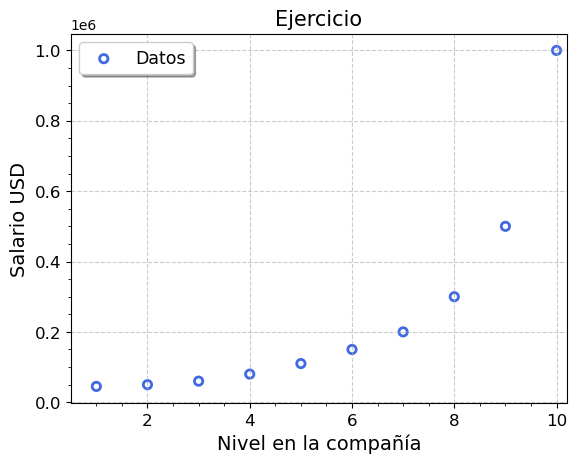

In [23]:
plt.scatter(df.Level,df.Salary,color='royalblue', linewidth=2, facecolor='none', label='Datos')
grafico_linea_ts(0.5,10.2,'Nivel en la compañía',
                 'Salario USD','Ejercicio',legend=True)

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 1 - El CEO no tiene quién le escriba </font>**

<font color="DarkBlue"> 1. Realice el análisis de regresión no-lineal para las variables de "Nivel" y "Salario" utilizando la regresión exponencial y la polinomial. 
    
<font color="DarkBlue"> 2. Determine, a travé de los coeficientes de correlación resultantes, ¿cuál es el mejor ajuste, el exponencial o el polinomial?
        
<font color="DarkBlue"> 3. Grafique los datos junto con sus 2 líneas ajustadas y escriba en el gráfico la ecuación que mejor describe a los datos, i.e., su resultado del punto 2. Explique sus resultados indicando cómo varía el salario dependiendo el nivel y qué tan diferente es el salario en una posición de entrada comparado con un CEO.
       
    
---

### **<font color="ForestGreen"> Función hiperbólica </font>**

La función hiperbólica tiene la siguiente forma:

\begin{align}
y=a+\frac{b}{x}
\end{align}

que en nuestra notación sería: 

\begin{align}
\hat{y}=\beta_0+\frac{\beta_1}{x}
\end{align}

donde $x'=\frac{1}{x}$.



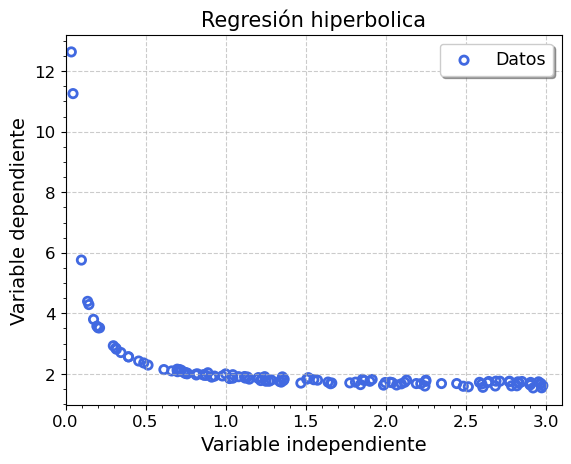

In [24]:
# Generar datos de ejemplo sinteticos
X = 3 * np.random.rand(120)  # Variable independiente
ruido = np.random.uniform(-.125, .125, size=len(X))
y = (1.5+ruido) + 0.5/(X*(1.2+ruido))

plt.scatter(X,y,color='royalblue', linewidth=2, facecolor='none', label='Datos')
grafico_linea_ts(0,3.1,'Variable independiente',
                 'Variable dependiente','Regresión hiperbolica',legend=True)

In [25]:
# conversion entre x y xprima
xprima=1/X

In [26]:
# regresion con linregress
resultado = stats.linregress(xprima, y)

In [27]:
# leemos los resultados de linregress
b1=resultado[0]
b0=resultado[1]
r=resultado[2]
print(b1,b0,r)

0.420461046204632 1.498896970690133 0.9973623930853347


Recordando que nuestra ecuación original se podía escribir como:

\begin{align}
\hat{Y}= y= \beta_0+\frac{\beta_1}{x}
\end{align}   

y la regla de correspondencia entre los coeficientes, podemos calcular nuestra $\hat{Y}$ original. 

<div class="alert alert-block alert-info">
<b>Nota:</b> Debido a que los coeficientes de regresión no fueron disfrazados, no es necesario reconvertirlos. Sólo necesitamos evaluar bien la función como dicta la ecuación anterior con un vector de la variable $x$ bien definido.
</div>

In [28]:
# hacemos un nuevo vector de x para evaluar nuestra predicciones aquí
xvec=np.linspace(0,4,100)
predicciones_completas=b0+ b1/xvec

/tmp/ipykernel_11231/2845356857.py:3: RuntimeWarning: divide by zero encountered in divide
  predicciones_completas=b0+ b1/xvec


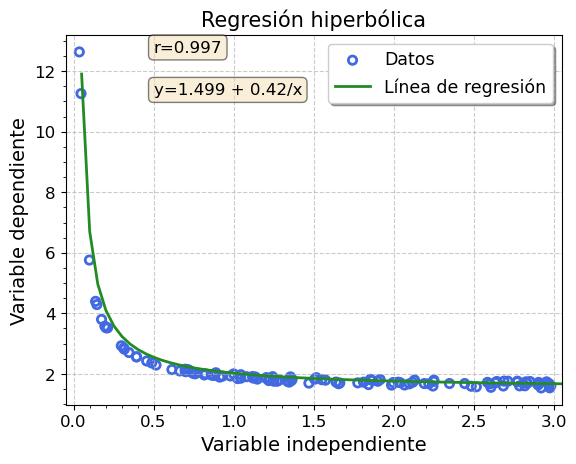

In [29]:
# evaluamos todo en la grafica
plt.scatter(X,y,color='royalblue', linewidth=2, facecolor='none', label='Datos')
plt.plot(xreal,predicciones_completas, color='forestgreen',linewidth=2, label='Línea de regresión')
# agregamos texto directamente a la grafica para mostrar la ecuacion de regresion y el coeficiente de correlacion. ... 
plt.text(0.5,np.max(y),"r="+str(np.around(r,3)),fontsize=12,bbox=props)
plt.text(0.5,np.max(y)-np.max(y)/9,"y="+str(np.around(b0,3))+" + "+str(np.around(b1,3))+"/x",fontsize=12,bbox=props)
grafico_linea_ts(-0.05,3.05,'Variable independiente',
                 'Variable dependiente','Regresión hiperbólica',legend=True)

### **<font color="ForestGreen"> Regresión logística </font>**

La regresión logística es otro tipo de regresión no lineal. De manera más común, es un tipo de análisis estadístico utilizado para modelar una variable de respuesta categórica (binaria o multinomial) en función de una o más variables predictoras. La regresión logística la veremos en 2 sabores, uno como 1 método más de regresión no-lineal, y otro como un método de clasificación, análogo a los vistos en la clase de ML.

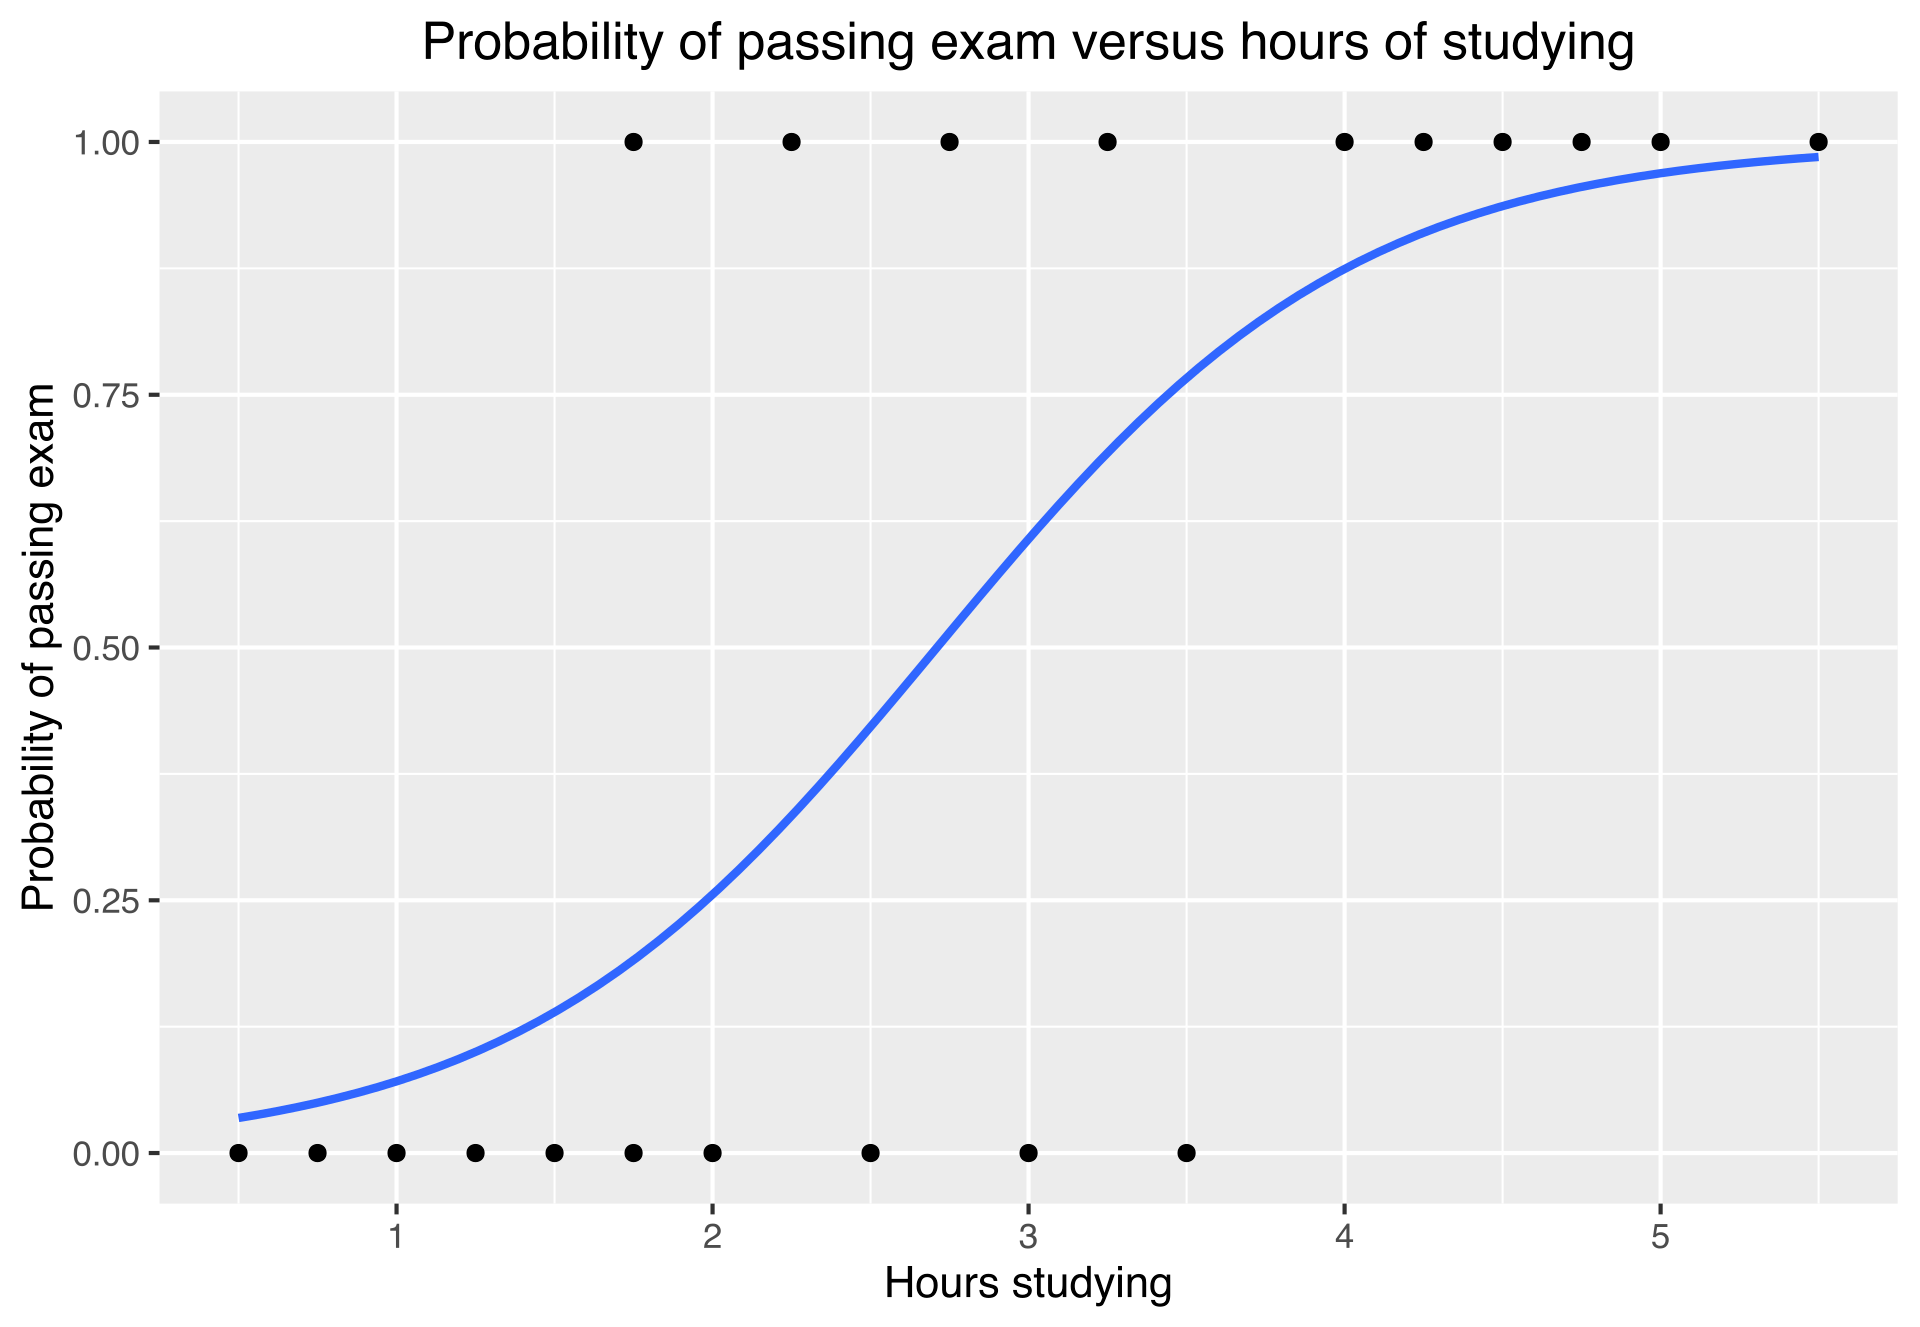
*La probabilidad de pasar un examen puede ser función de las horas utilizadas para estudiar, pero no es necesariamente una función lineal, sino una función de probabilidad que puede ser descrita por una función logística.*

#### **<font color="ForestGreen"> Regresión logística como un método más de regresión </font>**

En una versión, funciona tal como las otras regre diferencia de la regresión lineal, que predice valores continuos, la regresión logística predice la probabilidad de ocurrencia de un evento al ajustarse a una curva logística.

La función que queremos ajustar en este tipo de regresión es: 

\begin{align}
\hat{y}=\frac{1}{1+e^{\beta_0+\beta_1x}}
\end{align}

Sólo que en este caso no haremos el proceso de disfrazar a la función ya que no se puede hacer analíticamente, necesitamos más poder. 


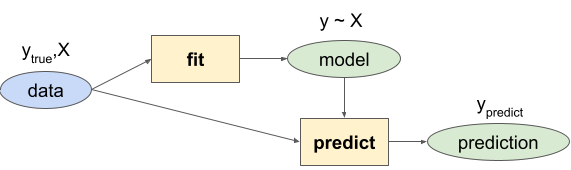

---
<a name='ej-1'></a>
### **<font color="OrangeRed">Ejemplo: Exoplanetas </font>**

<font color="DarkRed"> El descubrimiento de exoplanetas ha experimentado un notable cambio a lo largo del tiempo, impulsado por avances tecnológicos, metodológicos y teóricos. El lanzamiento del telescopio espacial Kepler en 2009 revolucionó el campo al monitorear más de 150,000 estrellas de manera continua, utilizando la técnica de tránsito. Kepler descubrió miles de exoplanetas, muchos de los cuales eran de tamaño terrestre o supertierras en las zonas habitables de sus estrellas.
    
<font color="DarkRed"> Utilizando el catálogo de exoplanetas de la NASA https://science.nasa.gov/exoplanets/exoplanet-catalog/ podemos analizar diferentes variables de cómo y cuáles exoplanetas han sido descubiertos.    
    
<font color="DarkRed">   1. Haga un análisis de regresión logística para las variables de # de exoplanetas descubiertos versus el año en el que fueron descubiertos. 

---

In [30]:
# cargamos datos con pandas
df=pd.read_csv('exo_Data.csv',header=0)
df

name planet_status     mass  mass_error_min  mass_error_max  \
0           11 Com b     Confirmed  16.1284         1.53491         1.53491   
1           11 Oph b     Confirmed  21.0000         3.00000         3.00000   
2           11 UMi b     Confirmed  11.0873         1.10000         1.10000   
3           14 And b     Confirmed   4.6840         0.23000         0.23000   
4           14 Her b     Confirmed      NaN             NaN             NaN   
...              ...           ...      ...             ...             ...   
5666   ZTFJ0220+21 b     Confirmed  14.0000         6.00000         6.00000   
5667   ZTFJ0407-00 b     Confirmed  19.0000         3.00000         3.00000   
5668  ZTF-J1622+47 b     Confirmed  61.0000        19.00000        19.00000   
5669   ZTFJ1637+49 b     Confirmed  23.0000         8.00000         8.00000   
5670   ZTFJ2252-05 b     Confirmed  26.0000         8.00000         8.00000   

      mass_sini  mass_sini_error_min  mass_sini_error_max  radius  \
0       16.1284              1.53491              1.53491     NaN   
1           NaN                  NaN                  NaN     NaN   
2       11.0873              1.10000              1.10000     NaN   
3        4.6840              0.23000              0.23000     NaN   
4           NaN              4.95000              4.95000     NaN   
...         ...                  ...                  ...     ...   
5666        NaN                  NaN                  NaN    0.54   
5667        NaN                  NaN                  NaN    0.44   
5668        NaN                  NaN                  NaN    0.98   
5669        NaN                  NaN                  NaN    0.68   
5670        NaN                  NaN                  NaN    0.49   

      radius_error_min  ...  star_sp_type  star_age  star_age_error_min  \
0                  NaN  ...        G8 III       NaN                 NaN   
1                  NaN  ...            M9     0.011               0.002   
2                  NaN  ...         K4III     1.560               0.540   
3                  NaN  ...         K0III       NaN                 NaN   
4                  NaN  ...          K0 V     5.100                 NaN   
...                ...  ...           ...       ...                 ...   
5666              0.07  ...            WD       NaN                 NaN   
5667              0.02  ...            WD       NaN                 NaN   
5668              0.02  ...           NaN       NaN                 NaN   
5669              0.07  ...            WD       NaN                 NaN   
5670              0.04  ...            WD       NaN                 NaN   

      star_age_error_max  star_teff  star_teff_error_min  star_teff_error_max  \
0                    NaN     4742.0                100.0                100.0   
1                  0.002     2375.0                175.0                175.0   
2                  0.540     4340.0                 70.0                 70.0   
3                    NaN     4813.0                 20.0                 20.0   
4                    NaN     5311.0                 87.0                 87.0   
...                  ...        ...                  ...                  ...   
5666                 NaN    14200.0               1000.0               1000.0   
5667                 NaN    17400.0               1200.0               1200.0   
5668                 NaN    29000.0                  NaN                  NaN   
5669                 NaN    11200.0                300.0                300.0   
5670                 NaN    15200.0                900.0                900.0   

      star_detected_disc  star_magnetic_field    star_alternate_names  
0                    NaN                  NaN                     NaN  
1                    NaN                  NaN  Oph 1622-2405, Oph 11A  
2                    NaN                  NaN                     NaN  
3                    NaN                  NaN                     NaN  
4   

In [31]:
df.columns

Index(['name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max',
       'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius',
       'radius_error_min', 'radius_error_max', 'orbital_period',
       'orbital_period_error_min', 'orbital_period_error_max',
       'semi_major_axis', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'discovered', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'impa

Text(0.5, 1.0, 'Scatter plot con seaborn')

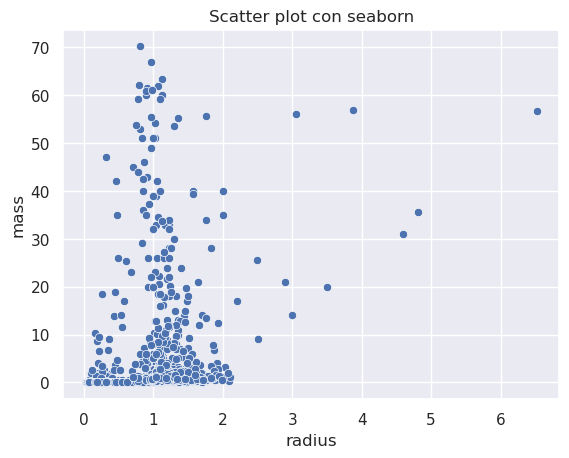

In [32]:
sns.set_theme()
sns.scatterplot(data=df,x='radius',y='mass')
plt.title('Scatter plot con seaborn')

Las columnas que sí nos interesa analizar son las que corresponden al nombre (`df.name`) y al año en el que fueron descubiertos los exoplanetas (`df.discovered`). 

Para esto podemos hacer un `df.groupby` y hacer el conteo `.count()` lo cual nos dirá cuántos exoplanetas fueron descubiertos cada año.

In [33]:
cuentas=df.groupby(df.discovered).count()['name']
print(cuentas)

discovered
1992.0       3
1995.0       3
1996.0       7
1997.0       1
1998.0       6
1999.0      16
2000.0      24
2001.0      15
2002.0      33
2003.0      31
2004.0      34
2005.0      37
2006.0      39
2007.0      66
2008.0      67
2009.0      90
2010.0     136
2011.0     208
2012.0     147
2013.0     185
2014.0     868
2015.0     170
2016.0    1536
2017.0     216
2018.0     359
2019.0     238
2020.0     245
2021.0     224
2022.0     343
2023.0     236
2024.0      76
Name: name, dtype: int64


Si, además, queremos calcular la suma acumulada de exoplanetas descubiertos, podemos utilizar la función `cumsum()` que nos hace este cálculo.

In [34]:
acumulado=cuentas.cumsum()
acumulado

discovered
1992.0       3
1995.0       6
1996.0      13
1997.0      14
1998.0      20
1999.0      36
2000.0      60
2001.0      75
2002.0     108
2003.0     139
2004.0     173
2005.0     210
2006.0     249
2007.0     315
2008.0     382
2009.0     472
2010.0     608
2011.0     816
2012.0     963
2013.0    1148
2014.0    2016
2015.0    2186
2016.0    3722
2017.0    3938
2018.0    4297
2019.0    4535
2020.0    4780
2021.0    5004
2022.0    5347
2023.0    5583
2024.0    5659
Name: name, dtype: int64

In [35]:
acumulado.name='conteo'

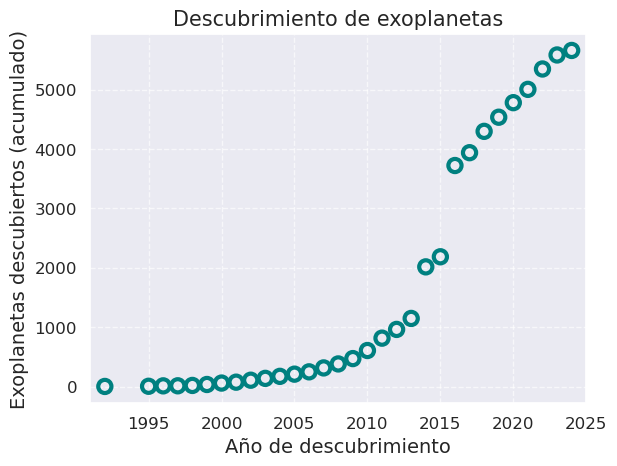

In [36]:
plt.scatter(acumulado.index,acumulado,color='teal', linewidth=3, s=90, facecolor='none', label='Datos')
grafico_linea_ts(1991,2025,'Año de descubrimiento','Exoplanetas descubiertos (acumulado)','Descubrimiento de exoplanetas',ymin=None,ymax=None,legend=False)

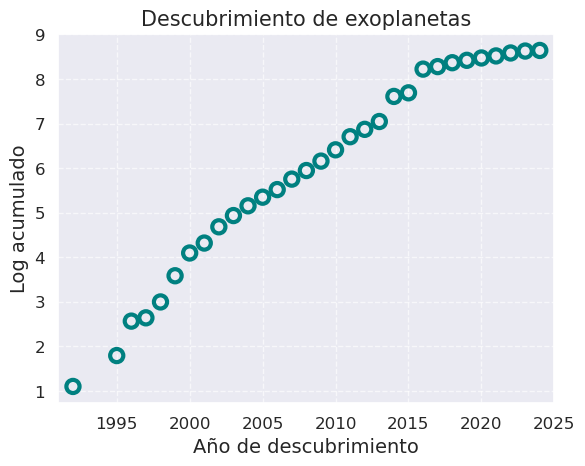

In [37]:
plt.scatter(acumulado.index,np.log(acumulado),color='teal', linewidth=3, s=90, facecolor='none', label='Datos')
grafico_linea_ts(1991,2025,'Año de descubrimiento','Log acumulado','Descubrimiento de exoplanetas',ymin=None,ymax=None,legend=False)

Antes de proceder a hacer la regresión logística es importante notar que esta función, la logística:

\begin{align}
\hat{y}=\frac{1}{1+e^{\beta_0+\beta_1x}}
\end{align}

está delimitada entre los valores de 0 y 1, por lo que es necesario acomodar nuestros datos para satisfacer esta condición.

Para esto, haremos un nuevo dataframe, uno donde los valores del acumulado de descubrimientos estén restringidos al intervalo $[0,1]$.

In [38]:
df=acumulado.reset_index()
df

discovered  conteo
0       1992.0       3
1       1995.0       6
2       1996.0      13
3       1997.0      14
4       1998.0      20
5       1999.0      36
6       2000.0      60
7       2001.0      75
8       2002.0     108
9       2003.0     139
10      2004.0     173
11      2005.0     210
12      2006.0     249
13      2007.0     315
14      2008.0     382
15      2009.0     472
16      2010.0     608
17      2011.0     816
18      2012.0     963
19      2013.0    1148
20      2014.0    2016
21      2015.0    2186
22      2016.0    3722
23      2017.0    3938
24      2018.0    4297
25      2019.0    4535
26      2020.0    4780
27      2021.0    5004
28      2022.0    5347
29      2023.0    5583
30      2024.0    5659

In [39]:
# normalizamos los datos por el valor maximo
maxi=df['conteo'].max()
df['conteo']=df['conteo']/maxi

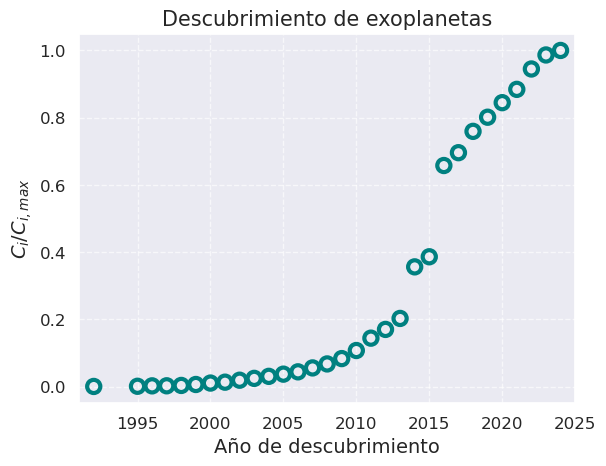

In [40]:
plt.scatter(df.discovered,df.conteo,color='teal', linewidth=3, s=90, facecolor='none', label='Datos')
grafico_linea_ts(1991,2025,'Año de descubrimiento','$C_i/C_{i,max}$','Descubrimiento de exoplanetas',ymin=None,ymax=None,legend=False)

Ahora, tendremos que utilizar una función diferente para hacer nuestra regresión con `statsmodels`.

`statsmodels.formula.api` es un módulo de la biblioteca `statsmodels` en Python que proporciona una interfaz para especificar y ajustar modelos estadísticos utilizando fórmulas al estilo de R. Este enfoque facilita la construcción de modelos de regresión al permitir especificar las relaciones entre las variables de manera intuitiva y declarativa. 

La función `logit` en el módulo `statsmodels.formula.api` se utiliza para ajustar modelos de regresión logística. Para usarla, se necesita un DataFrame con tus datos. Usa la función logit para especificar el modelo con una fórmula. La fórmula se pasa como una cadena de texto y sigue la notación estándar (por ejemplo, y ~ x1 + x2).



In [41]:
import statsmodels.formula.api as smf

En nuestro caso, la variable $y$ es el conteo y la $x$ es el año en el que fueron descubiertos. Entonces utilizando el dataframe podemos escribir:

In [42]:
model = smf.logit('conteo ~ discovered', data=df)
fit = model.fit()

Optimization terminated successfully.
         Current function value: 0.183203
         Iterations 9


Recordando cómo funcionaba statsmodels del notebook anterior, un resultado de un modelo con este paquete tiene los siguientes atributos principales:

lgunos de los atributos más importantes de este objeto son:

- `params`: Este atributo devuelve los coeficientes estimados para cada variable independiente en el modelo de regresión. Por ejemplo, si tienes un modelo con una variable independiente, params devolverá el coeficiente estimado para esa variable.

- `rsquared`: Este atributo devuelve el coeficiente de determinación ($R^2$) del modelo de regresión. Proporciona una medida de qué tan bien se ajustan los valores predichos por el modelo a los valores reales de la variable dependiente.

- `summary()` en Statsmodels se utiliza para obtener un resumen detallado del modelo de regresión lineal ajustado. Proporciona una descripción completa de las estadísticas relevantes del modelo, incluyendo los coeficientes estimados, los errores estándar, los valores p, las estadísticas de ajuste y más. 

In [43]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 conteo   No. Observations:                   31
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            1
Date:                Wed, 22 May 2024   Pseudo R-squ.:                  0.6796
Time:                        13:00:22   Log-Likelihood:                -5.6793
converged:                       True   LL-Null:                       -17.727
Covariance Type:            nonrobust   LLR p-value:                 9.167e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -760.6569    288.751     -2.634      0.008   -1326.599    -194.715
discovered     0.3775      0.143      2.634      0.008       0.097       0.658
==============================================================================
"""

In [44]:
b0=fit._results.params[0]
b1=fit._results.params[1]

Habiendo calculado los coeficientes de la ecuación logística, es importante recordar que la forma de esta función es:

\begin{align}
\hat{y}=\frac{1}{1+e^{\beta_0+\beta_1x}}
\end{align}

y que nuestros datos estaban normalizados por el valor máximo, por lo que podemos hacer una predicción de nuestros datos completa a través de la ecuación:

\begin{align}
\hat{y}=\frac{x_{max}}{1+e^{\beta_0+\beta_1x}}
\end{align}

In [45]:
yhat=np.max(acumulado.values)/(1+np.exp(-(b0+b1*df.discovered)))

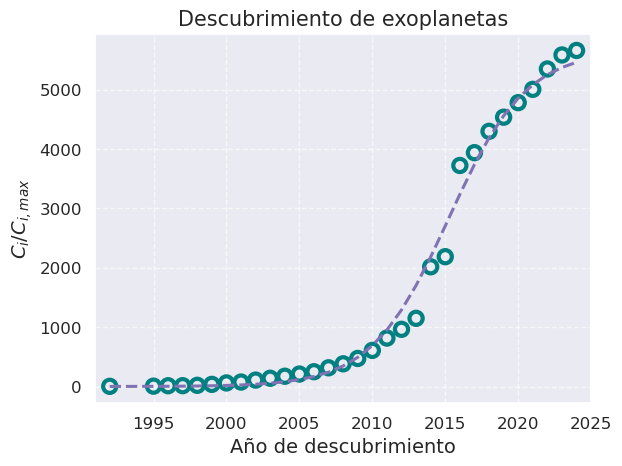

In [46]:
# grafica con regresion 
plt.plot(acumulado.index,np.squeeze(yhat),c='m',linewidth=2.2,linestyle='--')
plt.scatter(acumulado.index,acumulado,color='teal', linewidth=3, s=90, facecolor='none', label='Datos')
grafico_linea_ts(1991,2025,'Año de descubrimiento','$C_i/C_{i,max}$','Descubrimiento de exoplanetas',ymin=None,ymax=None,legend=False)

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 2 - El otoño de las poblaciones </font>**

<font color="DarkBlue"> Utilizando los datos de población siguientes:
    
<font color="DarkBlue"> 1. Seleccione los datos correspondientes a uno de los siguientes países: Brasil, Japón o Corea.
   
   <font color="DarkBlue"> 2. Haga un gráfico de dispersión de la población del país que escogió como función del año. 
         
    
<font color="DarkBlue"> 3. Realice un ajuste de regresión logística a los datos contrastando las variables `Year` contra `Value`.
       
    
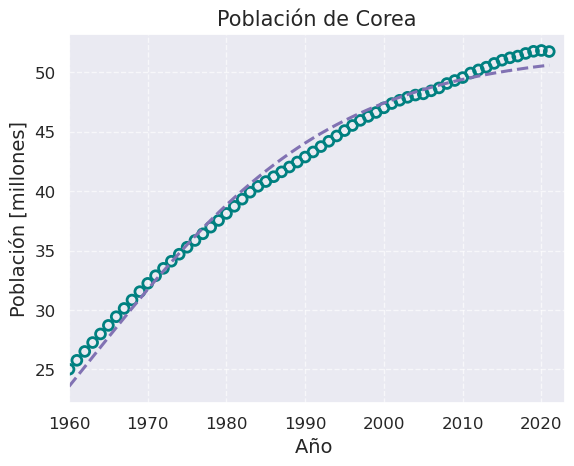
    
---

In [47]:
df=pd.read_csv('population.csv')
df['Country Name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

#### **<font color="ForestGreen"> Regresión logística como método de clasificación </font>**

En las ciencias de la Tierra, la regresión logística tiene varias aplicaciones importantes debido a su capacidad para manejar variables dependientes categóricas y predecir probabilidades de eventos discretos. Algunas aplicaciones incluyen:

1. Predicción de Desastres Naturales: Puede usarse para predecir la ocurrencia de desastres naturales como terremotos, inundaciones o deslizamientos de tierra. Por ejemplo, se puede modelar la probabilidad de un deslizamiento de tierra en función de variables como la pendiente del terreno, la cantidad de lluvia, el tipo de suelo, etc. También se puede estimar la probabilidad de ocurrencia de un ciclón tropical:

2. Mapeo de Zonas de Riesgo: Ayuda a identificar y mapear áreas de riesgo para diferentes tipos de desastres naturales. Utilizando datos históricos y variables geográficas, se puede estimar la probabilidad de que ciertos eventos ocurran en distintas zonas.

3. Estudios de Cambio Climático: La regresión logística puede emplearse para analizar la relación entre variables climáticas y la ocurrencia de fenómenos extremos como olas de calor, sequías o tormentas severas.

4. Evaluación de la Calidad del Agua y del Suelo: Se puede utilizar para predecir la probabilidad de contaminación en cuerpos de agua o suelos en función de factores como la proximidad a fuentes de contaminación, el uso del suelo, y parámetros físicos y químicos del agua o del suelo.

Para hacer nuestro análisis de clasificación necesitamos del paquete `sklearn`. Scikit-learn (abreviado como sklearn) es una biblioteca de Python especializada en aprendizaje automático. Es muy popular en la comunidad de ciencia de datos debido a su facilidad de uso, su amplia gama de algoritmos disponibles y su integración con otras bibliotecas de Python como NumPy, SciPy y Matplotlib.

La clasificación es una actividad muy frecuente e importante en las Ciencias de la Tierra. Incontables ejemplos como la **clasificación de imágenes satelitales**, **clasificación de hábitats**, **clasificación de formaciones geológicas en imágenes geofísicas** entre muchos otros ejemplos. 

Vamos a cargar los principales elementos de `sklearn` que queremos usar.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics

La función `train_test_split` de la biblioteca scikit-learn (sklearn) se utiliza para dividir un conjunto de datos en dos subconjuntos: uno para entrenamiento y otro para prueba. Esta división es crucial para evaluar el rendimiento de los modelos de aprendizaje automático de manera justa, asegurando que el modelo se entrene con un conjunto de datos y se evalúe con un conjunto separado que no ha visto antes. 

El módulo `linear_model` en la biblioteca scikit-learn (sklearn) contiene una colección de algoritmos para realizar regresión lineal y clasificación lineal.

`sklearn` también nos ofrece diferentes datasets que podemos utilizar para practicar. Uno de estos datasets se llama "Forest CoverType", se obtiene con la función `fetch_covtype`, es parte de la biblioteca scikit-learn y se utiliza comúnmente para tareas de clasificación en el aprendizaje automático. Este conjunto de datos contiene información sobre varios tipos de cobertura forestal, recolectada de más de 30 variables ambientales. El objetivo de jugar con estos datos es predecir el tipo de cobertura del suelo en un área forestal usando estas variables.

Descripción del Dataset

1. Características (Features): El dataset contiene 54 atributos, que incluyen características geográficas, climáticas y del suelo. Estas características son:

    -Elevación   
    -Aspecto (orientación)
    -Pendiente
    -Distancia horizontal al agua de superficie más cercana
    -Distancia vertical al agua de superficie más cercana
    -Distancia horizontal a la carretera más cercana
    -Altura relativa
    -Índices de sombra (varias horas del día)
    -Distancia horizontal al incendio forestal más cercano
    -Índices de tipo de suelo (categorías)
    -Índices de área silvícola (categorías)

2. Etiqueta (Label): El tipo de cobertura del suelo, representado por un entero de 1 a 7, que indica diferentes tipos de vegetación.

https://archive.ics.uci.edu/dataset/31/covertype

In [61]:
dataframe=pd.read_csv('covtype.csv')

Habiendo abierto los datos, vemos que es un diccionario con diferentes llaves que podemos usar para inspeccionar los datos. Por ejemplo:

In [62]:
dataframe

Unnamed: 0  Elevation  Aspect  Slope  \
0                0     2596.0    51.0    3.0   
1                1     2590.0    56.0    2.0   
2                2     2804.0   139.0    9.0   
3                3     2785.0   155.0   18.0   
4                4     2595.0    45.0    2.0   
...            ...        ...     ...    ...   
581007      581007     2396.0   153.0   20.0   
581008      581008     2391.0   152.0   19.0   
581009      581009     2386.0   159.0   17.0   
581010      581010     2384.0   170.0   15.0   
581011      581011     2383.0   165.0   13.0   

        Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
0                                  258.0                             0.0   
1                                  212.0                            -6.0   
2                                  268.0                            65.0   
3                                  242.0                           118.0   
4                                  153.0                            -1.0   
...                                  ...                             ...   
581007                              85.0                            17.0   
581008                              67.0                            12.0   
581009                              60.0                             7.0   
581010                              60.0                             5.0   
581011                              60.0                             4.0   

        Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
0                                 510.0          221.0           232.0   
1                                 390.0          220.0           235.0   
2                                3180.0          234.0           238.0   
3                                3090.0          238.0           238.0   
4                                 391.0          220.0           234.0   
...                                 ...            ...             ...   
581007                            108.0          240.0           237.0   
581008                             95.0          240.0           237.0   
581009                             90.0          236.0           241.0   
581010                             90.0          230.0           245.0   
581011                             67.0          231.0           244.0   

        Hillshade_3pm  ...  Soil_Type_31  Soil_Type_32  Soil_Type_33  \
0               148.0  ...           0.0           0.0           0.0   
1               151.0  ...           0.0           0.0           0.0   
2               135.0  ...           0.0           0.0           0.0   
3               122.0  ...           0.0           0.0           0.0   
4               150.0  ...           0.0           0.0           0.0   
...               ...  ...           ...           ...           ...   
581007          118.0  ...           0.0           0.0           0.0   
581008          119.0  ...           0.0           0.0           0.0   
581009          130.0  ...           0.0           0.0           0.0   
581010          143.0  ...           0.0           0.0           0.0   
581011          141.0  ...           0.0           0.0           0.0   

        Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  Soil_Type_38  \
0                0.0           0.0           0.0           0.0           0.0   
1                0.0           0.0           0.0           0.0           0.0   
2                0.0           0.0           0.0           0.0           0.0   
3                0.0           0.0           0.0           0.0           0.0   
4                0.0           0.0           0.0           0.0           0.0   
...              ...           ...           ...           ...           ...   
581007           0.0           0.0           0.0           0.0           0.0   
581008           0.0           0.0           0.0           0.0           0.0   
581009           0.0           0.0          

Tanto `frame` como `data` son muy parecidos pero una de ellas tiene una columna de más, que es la columna de CoverType, que es justo la clasificación que necesitamos. Entonces, este dataset tiene 54 variables con las que buscamos clasificar todos los árboles en 1 tipo de cobertura de entre 7 disponibles. 

In [63]:
dataframe['Cover_Type']

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int64

<Axes: xlabel='Horizontal_Distance_To_Hydrology', ylabel='Elevation'>

/home/jorgelsgf/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/jorgelsgf/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


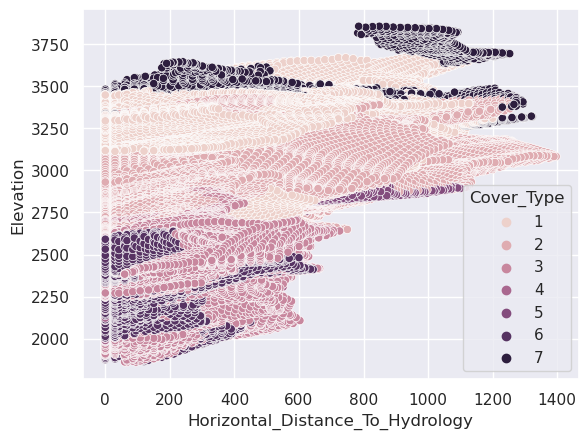

In [64]:
# scatterplot con seaborn. para obtener las pistas a esta funcion requerirá invitar tacos de tripa al profe
sns.scatterplot(data=dataframe,x='Horizontal_Distance_To_Hydrology',y='Elevation',hue='Cover_Type')

El ejercicio que haremos es el de clasificar los arboles de la cobertura del tipo 7 utilizando únicamente los datos de la variable Elevation. Del gráfico anterior y de la tabla siguiente es evidente que la cobertura 7 es un poco más alta que la mayoría de las otras coberturas. Entonces vamos a ver si podemos replicar la clasificación correctamente.

In [65]:
dataframe.groupby(dataframe.Cover_Type).mean()

Unnamed: 0    Elevation      Aspect      Slope  \
Cover_Type                                                      
1           330696.438907  3128.644888  156.138227  13.127110   
2           252886.878532  2920.936061  152.060515  13.550499   
3           336815.756139  2394.509845  176.372490  20.770208   
4            62967.609756  2223.939934  137.139425  18.528941   
5           212348.223217  2787.417571  139.283051  16.641315   
6           300925.029193  2419.181897  180.539068  19.048886   
7           372104.979961  3361.928669  153.236226  14.255924   

            Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
Cover_Type                                                                     
1                                 270.555245                       42.156939   
2                                 279.916442                       45.884219   
3                                 210.276473                       62.446915   
4                                 106.934838                       41.186749   
5                                 212.354893                       50.610344   
6                                 159.853458                       45.437439   
7                                 356.994686                       69.474305   

            Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
Cover_Type                                                                   
1                               2614.834517     211.998782      223.430211   
2                               2429.530799     213.844423      225.326596   
3                                943.940734     201.918415      215.826537   
4                                914.199490     228.345832      216.997088   
5                               1349.765722     223.474876      219.035816   
6                               1037.169805     192.844302      209.827662   
7                               2738.250463     216.967723      221.746026   

            Hillshade_3pm  ...  Soil_Type_30  Soil_Type_31  Soil_Type_32  \
Cover_Type                 ...                                             
1              143.875038  ...      0.056000      0.100821      0.085668   
2              142.983466  ...      0.046625      0.104327      0.089333   
3              140.367176  ...      0.000000      0.002965      0.000140   
4              111.392792  ...      0.000000      0.000000      0.000000   
5              121.920889  ...      0.032550      0.048457      0.054567   
6              148.284044  ...      0.003628      0.011516      0.031036   
7              134.932033  ...      0.010824      0.040907      0.031009   

            Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  \
Cover_Type                                                           
1               0.000444      0.004395      0.000066      0.000000   
2               0.005051      0.000042      0.000148      0.000000   
3               0.000000      0.000000      0.000000      0.000000   
4               0.000000      0.000000      0.000000      0.000000   
5               0.002107      0.000000      0.000000      0.000000   
6               0.000864      0.000000      0.000000      0.000000   
7               0.002487      0.046221      0.003072      0.014529   

            Soil_Type_37  Soil_Type_38  Soil_Type_39  
Cover_Type                                            
1               0.041206      0.037207      0.022781  
2               0.002612      0.001264      0.001172  
3               0.000000      0.000000      0.000000  
4               0.000000      0.000000      0.000000  
5               0.000000      0.000000      0.000000  
6               0.000000      0.000000      0.000000  
7               0.297611      0.271380      0.175134  

[7 rows x 55 columns]

La regresión logística es un modelo de clasificación que se utiliza para predecir la probabilidad de una clase o evento binario (dos posibles resultados, por ejemplo, 0 o 1). A diferencia de la regresión lineal, que puede predecir valores continuos, la regresión logística se utiliza para predecir probabilidades que luego se pueden convertir en clases. El objetivo de esta clasificación es obtener una función que nos diga la probabilidad de que un árbol por tener una cierta elevación, caiga en la cobertura tipo 7. 

In [66]:
# hacemos un nuevo dataframe donde haremos nuestra clasificacion
newdf=pd.DataFrame(dataframe['Elevation'])
newdf['C7']=0
newdf.loc[dataframe['Cover_Type']==7,'C7']=1

Podemos ver nuestro nuevo dataframe, debe quedar claro que la columna correspondiente a C7 tiene solamente 0s y 1s y cómo. Para esto podemos imprimir lo siguiente.

In [67]:
newdf

Elevation  C7
0          2596.0   0
1          2590.0   0
2          2804.0   0
3          2785.0   0
4          2595.0   0
...           ...  ..
581007     2396.0   0
581008     2391.0   0
581009     2386.0   0
581010     2384.0   0
581011     2383.0   0

[581012 rows x 2 columns]

In [68]:
newdf.loc[newdf.C7==1]

Elevation  C7
1654       3273.0   1
1655       3264.0   1
1656       3256.0   1
1662       3268.0   1
1663       3268.0   1
...           ...  ..
553565     3304.0   1
553760     3338.0   1
553761     3335.0   1
553762     3329.0   1
553957     3341.0   1

[20510 rows x 2 columns]

Es fundamental dividir el conjunto de datos en dos partes: datos de entrenamiento y datos de prueba. Esto permite entrenar el modelo y luego evaluar su rendimiento en un conjunto de datos que no ha visto antes. 

In [69]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(newdf.Elevation,newdf.C7, test_size=0.2, random_state=42)

Se crea una instancia del modelo de regresión logística de scikit-learn. Posteriormente, se entrena el modelo utilizando el conjunto de datos de entrenamiento.

In [70]:
# crea instancia del modelo de regresion logistica
reg = linear_model.LogisticRegression()

# entrenar el modelo con los datos de entrenamiento
reg.fit(np.asarray(X_train).reshape(-1, 1), y_train)



LogisticRegression()

Una vez entrenado, el modelo puede predecir las etiquetas de nuevos datos o del conjunto de datos de prueba.

In [71]:
# predicciones con los datos de prueba
y_pred = reg.predict(np.asarray(X_test).reshape(-1,1))

Se evalúa el rendimiento del modelo utilizando métricas como precisión, exactitud, sensibilidad, especificidad, etc., comparando las predicciones del modelo con las etiquetas reales en el conjunto de datos de prueba.

In [72]:
 #comparando valores  del modelo regresion 
print(" Precisión del modelo (%):",
      metrics.accuracy_score(y_test, y_pred)*100)

 Precisión del modelo (%): 96.46824952884177


Finalmente, podemos verlos resultados de nuestro modelo a través de graficar la función logística resultante de la regresión y además los datos.

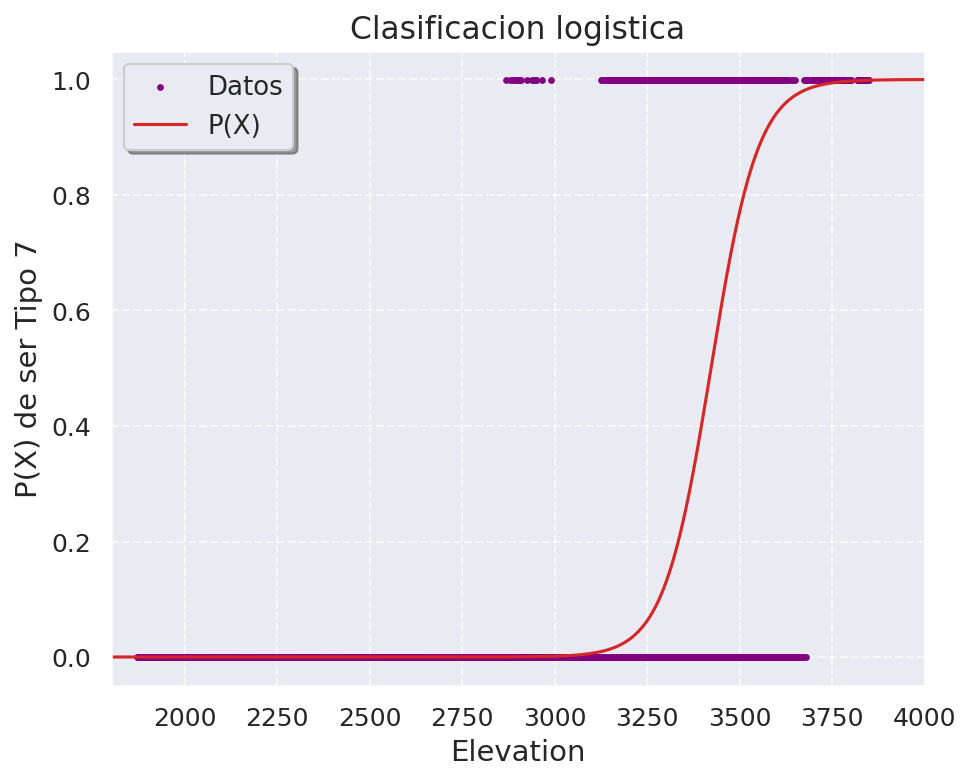

In [73]:
plt.figure(figsize=(7,5.5),dpi=150)
plt.scatter(X_test,y_test,s=5,c='purple',label='Datos')
plt.plot(np.arange(1800,4000),reg.predict_proba(np.arange(1800,4000).reshape(-1, 1))[:,1],c='tab:red',label='P(X)')
grafico_linea_ts(1800,4000,'Elevation','P(X) de ser Tipo 7','Clasificacion logistica',legend=True)

Como vimos en las clases de ML, existen muchos otros métodos de clasificación, algunos de ellos parecidos a la regresión lineal y otros muy diferentes. El objetivo de estos análisis es poder relacionar ciertas variables con una categoría, en este ejemplo clasificamos tipos de cobertura de árboles pero utilizando variables producto de variables satelitales podríamos hacer lo mismo con nubes en la superficie de la Tierra, clasificar exoplanetas acorde a ciertas variables como cantidad de CO2, etc. Clasificar es algo que hacemos todos los días pero utilizando grandes volúmenes de datos, ¿cómo le hacemos? Bueno, pues para esto existen estos métodos.

### **<font color="ForestGreen"> Regresión lineal multivariada </font>**

La regresión lineal multivariada es una extensión de la regresión lineal simple que permite modelar la relación entre una variable dependiente continua y múltiples variables independientes (predictoras). Es una técnica ampliamente utilizada en diversos campos para predecir el valor de una variable de interés basándose en la influencia conjunta de varias variables.

Este tipo de regresión es una herramienta estadística poderosa y versátil que permite analizar y predecir la influencia conjunta de múltiples variables independientes sobre una variable dependiente continua.

El modelo de regresión lineal multivariada se representa como:

\begin{align}
\hat{y}=\beta_0+\beta_1 x_1+ \beta_2 x_2+ ... \beta_n x_n + \epsilon
\end{align}

donde:

- $Y$ es la variable dependiente.
- $\beta_0$ es la ordenada al origen (intercepto).
- $\beta_1,\,\beta_2,\,\beta_n$ son los coeficientes de las variables predictoras.
- $x_1,\,x_2,\,x_n$ son las variables independientes.
- $\epsilon$ es el término de error que captura la variabilidad no explicada por las variables predictoras.

Antes de empezar a hacer un análisis, vamos a cargar otro módulo de `scikit-learn` para poder evaluar nuestros modelos y regresiones rápidamente.
El módulo metrics de la biblioteca `scikit-learn` proporciona una amplia gama de herramientas y funciones para evaluar el rendimiento de los modelos de aprendizaje automático. Este módulo es esencial para validar y comparar modelos, asegurando que sean efectivos y generalicen bien a nuevos datos. Recuerden que 2 maneras de medir qué tan bueno es un modelo es con el error cuadrático medio y el R$^2$.


In [74]:
from sklearn.metrics import mean_squared_error, r2_score


### **<font color="ForestGreen"> Ejemplo: el suelo en su laberinto </font>**

Supongamos que somos científicos ambientales interesados en predecir la calidad del suelo en diferentes áreas agrícolas. Sabemos que la calidad del suelo está influenciada por varios factores, incluyendo la cantidad de nutrientes como nitrógeno, fósforo y potasio presentes en el suelo. Nuestro objetivo es desarrollar un modelo de regresión lineal multivariada que nos permita predecir la calidad del suelo basada en las mediciones de estos nutrientes.
Descripción de los Datos

Para este análisis, generamos un conjunto de datos sintéticos que simulan las mediciones de nutrientes y la calidad del suelo:

- Nitrógeno (N): Cantidad de nitrógeno en el suelo (valores entre 0 y 100).
- Fósforo (P): Cantidad de fósforo en el suelo (valores entre 0 y 50).
- Potasio (K): Cantidad de potasio en el suelo (valores entre 0 y 80).
- Calidad del Suelo: Valor numérico que representa la calidad del suelo, calculado como una combinación lineal de los nutrientes con un poco de ruido aleatorio para simular variabilidad en los datos reales.

In [75]:
# Generar datos aleatorios
np.random.seed(42)
n_samples = 100

nitrogeno = np.random.rand(n_samples) * 100  # valores entre 0 y 100
fosforo = np.random.rand(n_samples) * 50    # valores entre 0 y 50
potasio = np.random.rand(n_samples) * 80    # valores entre 0 y 80

# Calidad del suelo como una función de las variables predictoras con algo de ruido
calidad_suelo = 2.5 * nitrogeno - (4.5+np.random.randn(n_samples)/50) * fosforo + 3 * potasio + np.random.randn(n_samples) * 12

# Crear un DataFrame de pandas con los datos generados
data = {
    'Nitrógeno': nitrogeno,
    'Fósforo': fosforo,
    'Potasio': potasio,
    'Calidad_Suelo': calidad_suelo
}

df = pd.DataFrame(data)


<Axes: xlabel='Nitrógeno', ylabel='Calidad_Suelo'>

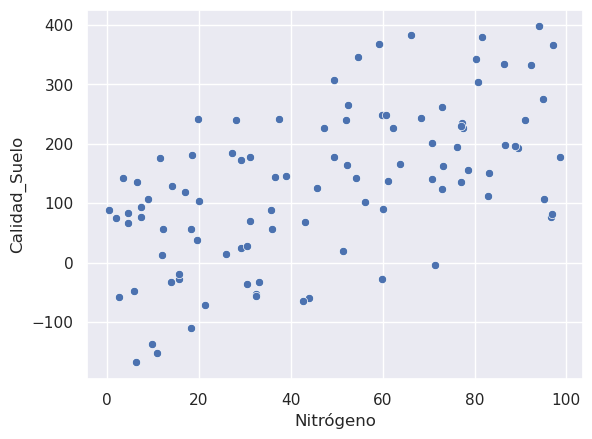

In [76]:
# scatter plot de seaborn
sns.scatterplot(data=df,x='Nitrógeno',y='Calidad_Suelo')

<Axes: xlabel='Fósforo', ylabel='Calidad_Suelo'>

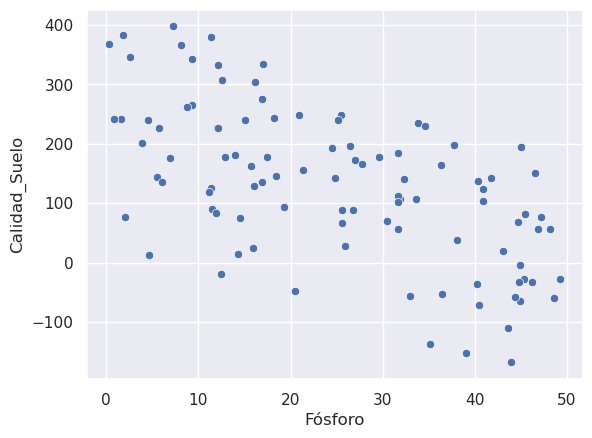

In [77]:
sns.scatterplot(data=df,x='Fósforo',y='Calidad_Suelo')

Separamos las variables predictoras (X) de la variable dependiente (y) y dividimos los datos en conjuntos de entrenamiento y prueba. Esto es parte de hacer análisis de datos, pasar de la parte imaginaria (lo que creo que tengo que hacer) al objetivo, requiere una serie de pasos que muchas veces dependen de los paquetes o funciones que usemos. En este caso, tenemos que hacer lo siguiente:

In [78]:
# Separar las variables predictoras (X) y la variable dependiente (y)
X = df[['Nitrógeno', 'Fósforo', 'Potasio']]
y = df['Calidad_Suelo']

In [79]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
X_train

Nitrógeno    Fósforo    Potasio
55  92.187424  12.102764  44.544101
88  88.721274  26.482529  22.923300
26  19.967378  40.900738  77.840844
42   3.438852  24.862425  73.189151
69  98.688694  29.544647  23.487348
..        ...        ...        ...
60  38.867729  18.389157  49.200578
71  19.871568   0.829391  64.809072
14  18.182497  31.670188  56.974338
92  76.078505  45.020903  65.808045
51  77.513282  11.978095  30.807818

[80 rows x 3 columns]

In [81]:
X_test

Nitrógeno    Fósforo    Potasio
83   6.355835  43.866968   7.518555
53  89.482735  24.472638  25.353760
70  77.224477  33.878218  64.748892
45  66.252228   1.844347  74.265485
44  25.877998  14.242025   1.236529
39  44.015249  48.589104  14.168854
22  29.214465  15.900174   7.493981
80  86.310343  17.053318  71.200427
10   2.058449  14.487573  43.898703
0   37.454012   1.571459  51.362532
18  43.194502  44.627950  51.970632
30  60.754485  20.870550  63.584904
73  81.546143  11.324789  73.059244
33  94.888554  16.880759  39.401416
90  11.959425   4.655138   2.440020
4   15.601864  45.378324  48.514325
76  77.127035  34.546887  63.863614
77   7.404465  19.336767  51.997114
12  83.244264  46.484883  52.156901
31  17.052412  11.105391  40.210967

Utilizamos la clase `LinearRegression` de scikit-learn para crear el modelo de regresión lineal y lo entrenamos con los datos de entrenamiento.

In [82]:
# Crear el modelo de regresión lineal
model = LinearRegression()

NameError: name 'LinearRegression' is not defined

In [ ]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

In [ ]:
# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

In [ ]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coeficientes del modelo:", model.coef_)
print("Intercepto del modelo:", model.intercept_)
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

# Salida de las predicciones
print("Predicciones:", y_pred)

In [ ]:
plt.figure(figsize=(7,11),dpi=120)
for ivar,variable in enumerate(['Fósforo','Nitrógeno','Potasio']):
    plt.subplot(311+ivar)
    plt.scatter(X_test[variable],y_test,label='Datos prueba',marker='s')
    plt.scatter(X_test[variable],y_pred,label='Predicciones',marker='P')
    grafico_linea_ts(0,50,variable,
                 'Calidad del suelo','Regresión multivariada',legend=True)
plt.tight_layout()

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 3 - Crónica de una clasificación anunciada </font>**

<font color="DarkBlue"> 1. Repita la clasificación de la cobertura pero utilizando la variable Horizontal_Distance_To_Hydrology buscando clasificar el tipo de cobertura #6.
    
<font color="DarkBlue"> 2. Determine, a travé de la métrica para la evaluación del modelo, ¿cuál es el mejor ajuste, el realizado en el ejemplo para el tipo de cobertura 7 o el de este ejercicio?
              
    
---